In [ ]:
from PIL import Image
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#use example blues.00001 song
image = Image.open('/content/drive/MyDrive/Data/images_original/blues/blues00001.png')

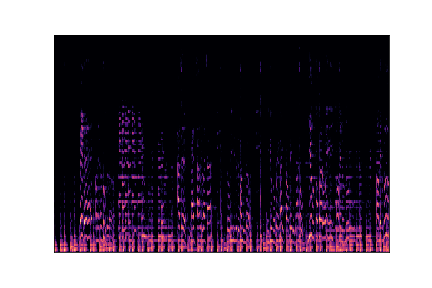

In [ ]:
image

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

#we will try make our own spectrogram

In [ ]:
signal, sample_rate = librosa.load('/content/drive/MyDrive/Data/genres_original/blues/blues.00001.wav')

In [ ]:
print(signal)
print(sample_rate)

[ 0.00341797  0.00430298  0.00137329 ... -0.11953735 -0.17495728
 -0.15118408]
22050


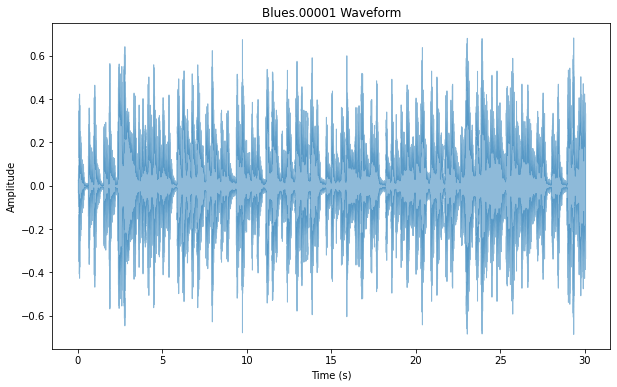

In [ ]:
#can make a waveform:
plt.figure(figsize = (10,6))
librosa.display.waveshow(signal, sr = sample_rate, alpha = 0.5)
#lower alpha gives higher transparency 
plt.title('Blues.00001 Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

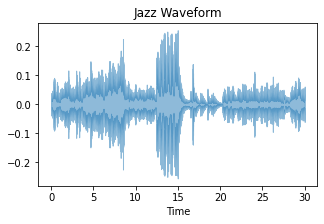

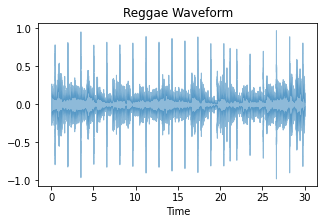

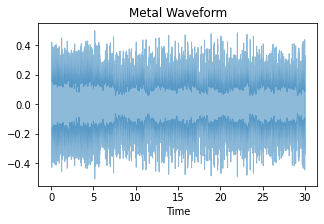

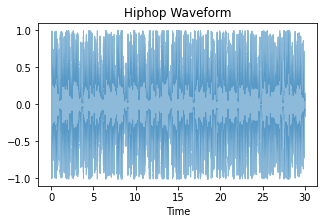

In [ ]:
#examples of other genre waveforms

signal_1, sample_rate_1 = librosa.load('/content/drive/MyDrive/Data/genres_original/jazz/jazz.00001.wav')
signal_2, sample_rate_2 = librosa.load('/content/drive/MyDrive/Data/genres_original/reggae/reggae.00001.wav')
signal_3, sample_rate_3 = librosa.load('/content/drive/MyDrive/Data/genres_original/metal/metal.00001.wav')
signal_4, sample_rate_4 = librosa.load('/content/drive/MyDrive/Data/genres_original/hiphop/hiphop.00001.wav')

plt.figure(figsize = (5,3))
librosa.display.waveshow(signal_1, sr = sample_rate_1, alpha = 0.5)
plt.title('Jazz Waveform')
plt.show()

plt.figure(figsize = (5,3))
librosa.display.waveshow(signal_2, sr = sample_rate_2, alpha = 0.5)
plt.title('Reggae Waveform')
plt.show()

plt.figure(figsize = (5,3))
librosa.display.waveshow(signal_3, sr = sample_rate_3, alpha = 0.5)
plt.title('Metal Waveform')
plt.show()

plt.figure(figsize = (5,3))
librosa.display.waveshow(signal_4, sr = sample_rate_4, alpha = 0.5)
plt.title('Hiphop Waveform')
plt.show()

In [ ]:
#fast fourier transform
ft = np.fft.fft(signal)
spectrum = np.abs(ft)
freq = np.linspace(0, sample_rate, len(spectrum))

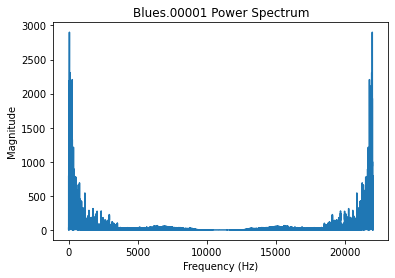

In [ ]:
#plot power spectrum
plt.figure(figsize=(6,4))
plt.plot(freq, spectrum)
plt.title('Blues.00001 Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
#slice specturm
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_freq = freq[:int(len(spectrum)/2)]

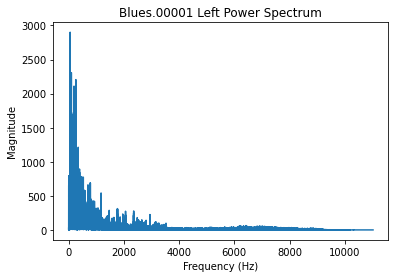

In [ ]:
#plot left power spectrum
#not sure why we do this?
plt.figure(figsize=(6,4))
plt.plot(left_freq, left_spectrum)
plt.title('Blues.00001 Left Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

#see we have a higher magnitude for lower frequencies and a smaller magnitude for higher frequencies

In [ ]:
#short time fourier transform for spectrograms
hop_len = 512 #no of samples?
no_fft = 2048 #no of samples for window

stft = librosa.stft(signal, n_fft = no_fft, hop_length = hop_len)


In [ ]:
spectrogram = np.abs(stft)

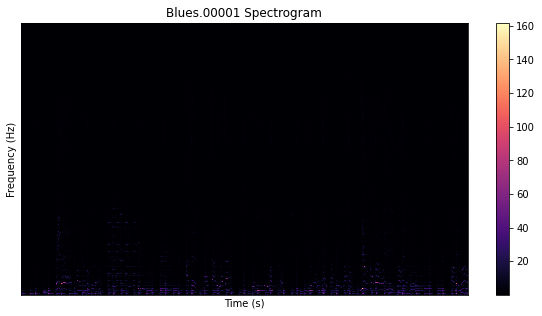

In [ ]:
#plot spectrogram
#three dimensions - freq time and magnitude
plt.figure(figsize=(10,5))
librosa.display.specshow(spectrogram, sr = sample_rate, hop_length = hop_len)
plt.colorbar()
plt.title('Blues.00001 Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()
#here the colour shows magnitude
#not very clear as the magnitude range is too big
#plot in decibels instead

In [ ]:
#get values in decibels:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

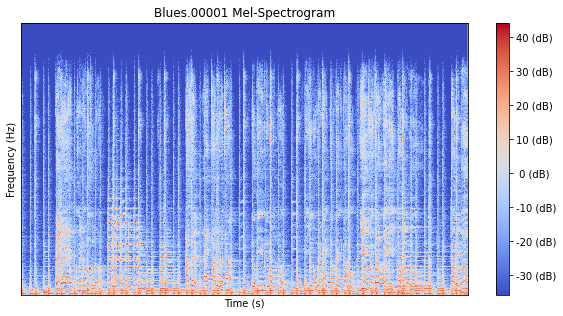

In [ ]:
#plot mel-spectrogram in decibels
plt.figure(figsize=(10,5))
librosa.display.specshow(log_spectrogram, sr = sample_rate, hop_length = hop_len)
plt.colorbar(format = '%2.0f (dB)')
plt.title('Blues.00001 Mel-Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()
#here the colour shows decibels
#the range is much better

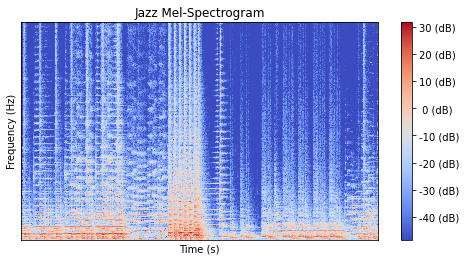

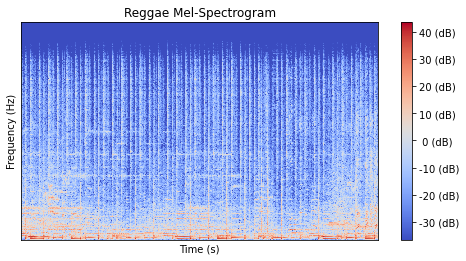

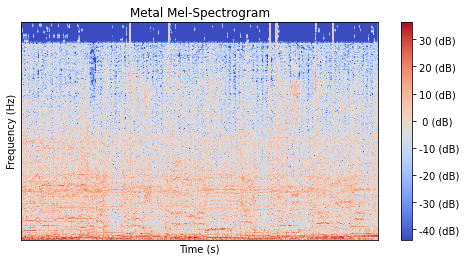

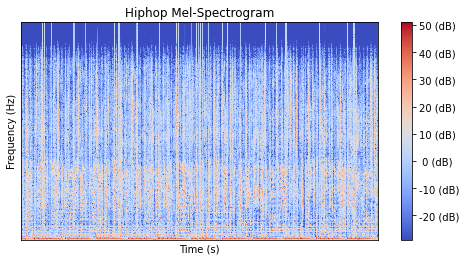

In [ ]:
#condensed code for spectrograms of other genres

stft_1 = librosa.stft(signal_1)
stft_db_1 = librosa.amplitude_to_db(abs(stft_1))
plt.figure(figsize=(8,4))
librosa.display.specshow(stft_db_1, sr = sample_rate_1)
plt.colorbar(format = '%2.0f (dB)')
plt.title('Jazz Mel-Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

stft_2 = librosa.stft(signal_2)
stft_db_2 = librosa.amplitude_to_db(abs(stft_2))
plt.figure(figsize=(8,4))
librosa.display.specshow(stft_db_2, sr = sample_rate_2)
plt.colorbar(format = '%2.0f (dB)')
plt.title('Reggae Mel-Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

stft_3 = librosa.stft(signal_3)
stft_db_3 = librosa.amplitude_to_db(abs(stft_3))
plt.figure(figsize=(8,4))
librosa.display.specshow(stft_db_3, sr = sample_rate_3)
plt.colorbar(format = '%2.0f (dB)')
plt.title('Metal Mel-Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

stft_4 = librosa.stft(signal_4)
stft_db_4 = librosa.amplitude_to_db(abs(stft_4))
plt.figure(figsize=(8,4))
librosa.display.specshow(stft_db_4, sr = sample_rate_4)
plt.colorbar(format = '%2.0f (dB)')
plt.title('Hiphop Mel-Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [ ]:
#mel frequency cepstral coeficient 
#MFCC
MFCCs = librosa.feature.mfcc(y = signal, sr = sample_rate, n_fft = no_fft, hop_length = hop_len, n_mfcc = 13)
#we use 13 MFCCs

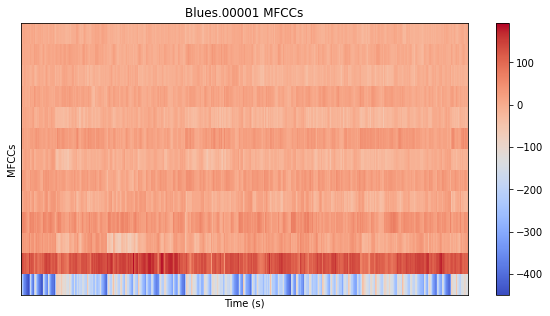

In [ ]:
plt.figure(figsize = (10,5))
librosa.display.specshow(MFCCs, sr = sample_rate, hop_length = hop_len)
plt.colorbar()
plt.title('Blues.00001 MFCCs')
plt.xlabel('Time (s)')
plt.ylabel('MFCCs')
plt.show()
#13 stripes are the 13 MFCCs 

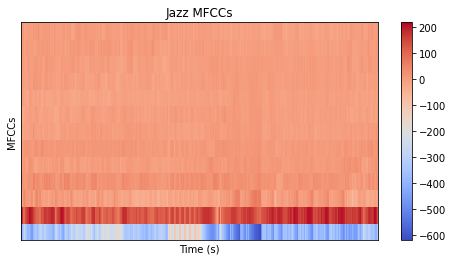

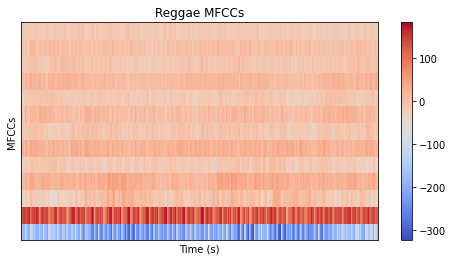

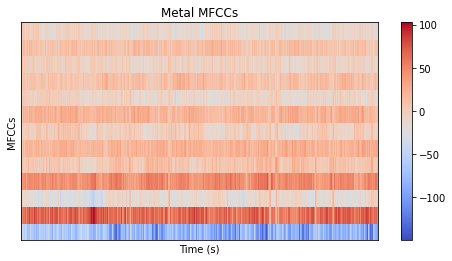

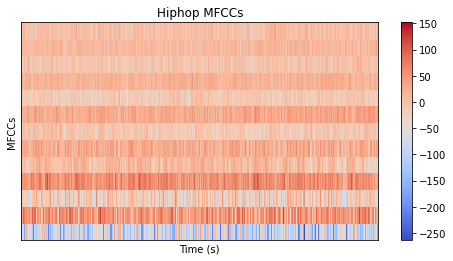

In [ ]:
#other genres MFCCs
MFCCs_1 = librosa.feature.mfcc(y = signal_1, sr = sample_rate_1, n_fft = no_fft, hop_length = hop_len, n_mfcc = 13)
MFCCs_2 = librosa.feature.mfcc(y = signal_2, sr = sample_rate_2, n_fft = no_fft, hop_length = hop_len, n_mfcc = 13)
MFCCs_3 = librosa.feature.mfcc(y = signal_3, sr = sample_rate_3, n_fft = no_fft, hop_length = hop_len, n_mfcc = 13)
MFCCs_4 = librosa.feature.mfcc(y = signal_4, sr = sample_rate_4, n_fft = no_fft, hop_length = hop_len, n_mfcc = 13)

plt.figure(figsize = (8,4))
librosa.display.specshow(MFCCs_1, sr = sample_rate_1, hop_length = hop_len)
plt.colorbar()
plt.title('Jazz MFCCs')
plt.xlabel('Time (s)')
plt.ylabel('MFCCs')
plt.show()

plt.figure(figsize = (8,4))
librosa.display.specshow(MFCCs_2, sr = sample_rate_2, hop_length = hop_len)
plt.colorbar()
plt.title('Reggae MFCCs')
plt.xlabel('Time (s)')
plt.ylabel('MFCCs')
plt.show()

plt.figure(figsize = (8,4))
librosa.display.specshow(MFCCs_3, sr = sample_rate_3, hop_length = hop_len)
plt.colorbar()
plt.title('Metal MFCCs')
plt.xlabel('Time (s)')
plt.ylabel('MFCCs')
plt.show()

plt.figure(figsize = (8,4))
librosa.display.specshow(MFCCs_4, sr = sample_rate_4, hop_length = hop_len)
plt.colorbar()
plt.title('Hiphop MFCCs')
plt.xlabel('Time (s)')
plt.ylabel('MFCCs')
plt.show()

In [ ]:
#changing the audio wav file into an image
#this image can be process by a CNN, for a classification task
#now we will change all of the audio files in the dataset into MFCCs 

import json
import os
import math


In [ ]:
dataset_path = '/content/drive/MyDrive/Data/genres_original'
json_path = 'data_10.json'
sample_r = 22050
track_duration = 30
samples_per_track = sample_rate*track_duration


In [ ]:
#saves mfccs into json file with genre labels
def save_mfcc(dataset_path, json_path, num_mfcc = 13, n_fft = 2048, hop_length = 512, num_segments = 5):
    data = {'mapping': [], 'labels': [], 'mfcc': []}
    
    samples_per_segment = int(samples_per_track / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)
    
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath is not dataset_path:
            #to split up genre folders, label with last folder [-1] i.e. genre 
            semantic_label = dirpath.split("/")[-1]
            data['mapping'].append(semantic_label)
            
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr = sample_r)
                
                for d in range(num_segments):
                    start = samples_per_segment * d
                    finish =  start + samples_per_segment
                    
                    mfcc = librosa.feature.mfcc(y = signal[start:finish], sr = sample_rate, n_mfcc = num_mfcc, n_fft = n_fft, hop_length = hop_length)
                    mfcc = mfcc.T
                    
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data['mfcc'].append(mfcc.tolist())
                        data['labels'].append(i-1)
                        
    with open(json_path, 'w') as fp:
        json.dump(data, fp, indent = 4)


In [ ]:
#save_mfcc(dataset_path, json_path, num_segments = 10)

In [ ]:
#now we have saved the data we will make a neural network for classifying the genres
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import random


In [ ]:
def load_data(data_path):
    with open(data_path, 'r') as f:
        data = json.load(f)
    
    X = np.array(data['mfcc'])
    Y = np.array(data['labels'])
    
    return X, Y

In [ ]:
X, Y = load_data('/content/drive/MyDrive/Data/data_10.json')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
X.shape

(9986, 130, 13)

In [ ]:
#building a simple artificial neural network
model = keras.Sequential([
    #input layer
    #shape is (130, 13) from X.shape
    keras.layers.Flatten(input_shape = (X.shape[1], X.shape[2])),
    #first dense layer
    #512 neurons
    keras.layers.Dense(512, activation = 'relu'),
    #second dense layer
    #256 neurons
    keras.layers.Dense(256, activation = 'relu'),
    #third dense layer
    #64 neurons
    keras.layers.Dense(64, activation = 'relu'),
    #output layer
    keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
optimiser = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer = optimiser, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])



In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 1690)              0         
                                                                 
 dense_16 (Dense)            (None, 512)               865792    
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 64)                16448     
                                                                 
 dense_19 (Dense)            (None, 10)                650       
                                                                 
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size = 32, epochs = 100)
#training the model

Epoch 1/100
250/250 [==============================] - 4s 13ms/step - loss: 5.7769 - accuracy: 0.2832 - val_loss: 2.2879 - val_accuracy: 0.2142
Epoch 2/100
250/250 [==============================] - 4s 15ms/step - loss: 2.0641 - accuracy: 0.2534 - val_loss: 2.1449 - val_accuracy: 0.2698
Epoch 3/100
250/250 [==============================] - 3s 14ms/step - loss: 1.9183 - accuracy: 0.3007 - val_loss: 2.1192 - val_accuracy: 0.2528
Epoch 4/100
250/250 [==============================] - 4s 15ms/step - loss: 1.8194 - accuracy: 0.3565 - val_loss: 2.1222 - val_accuracy: 0.3403
Epoch 5/100
250/250 [==============================] - 3s 11ms/step - loss: 1.7494 - accuracy: 0.3662 - val_loss: 2.0219 - val_accuracy: 0.3458
Epoch 6/100
250/250 [==============================] - 3s 11ms/step - loss: 1.6891 - accuracy: 0.3845 - val_loss: 2.1312 - val_accuracy: 0.3664
Epoch 7/100
250/250 [==============================] - 3s 11ms/step - loss: 1.6081 - accuracy: 0.4100 - val_loss: 1.9160 - val_accuracy:

In [ ]:
def plot_history(history):
  plt.figure(figsize=(6,3))
  #create accuracy sublpot
  plt.plot(history.history["accuracy"], label="train accuracy")
  plt.plot(history.history["val_accuracy"], label="test accuracy")
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  #axs[0].legend(loc="lower right")
  plt.title('Accuracy Comparison')
  plt.legend()
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(6,3))
  #create error sublpot
  plt.plot(history.history["loss"], label="train error")
  plt.plot(history.history["val_loss"], label="test error")
  plt.ylabel('Error')
  plt.xlabel('Epoch')
  #axs[1]wlegend(loc="upper right")
  plt.title('Error Comparison')
  plt.legend()
  plt.tight_layout()
  plt.show()

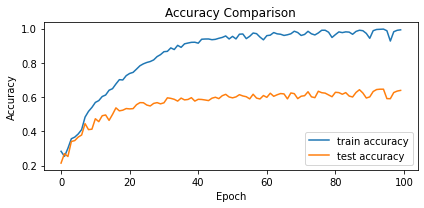

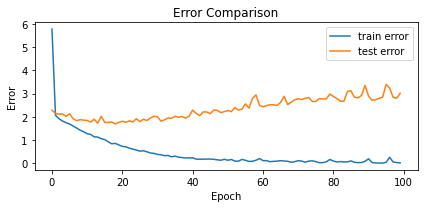

In [ ]:
plot_history(history)
#plotting accuracy and error as a function of the epochs

In [ ]:
#this is okay but not amazing. can see theres fairly big difference between test and train above
#this is because of overfitting so we need to reduce overfitting
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size = 32)

63/63 [==============================] - 0s 5ms/step - loss: 0.5357 - accuracy: 0.9304


In [ ]:
#the difference is because of overfitting, we need to reduce this
model_regularised = keras.Sequential([
    #input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),
    #first dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),  
    #second dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    #third dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    #output layer
    keras.layers.Dense(10, activation='softmax')                                
])

#only difference here is the kernal regularisers and dropout layers

In [ ]:
optimiser = keras.optimizers.Adam(learning_rate = 0.0001)
model_regularised.compile(optimizer = optimiser, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])



In [ ]:
#train regularised model
#history = model_regularised.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 5s 17ms/step - loss: 22.4725 - accuracy: 0.1673 - val_loss: 3.5095 - val_accuracy: 0.1857
Epoch 2/100
250/250 [==============================] - 4s 16ms/step - loss: 5.7728 - accuracy: 0.1579 - val_loss: 3.4708 - val_accuracy: 0.1336
Epoch 3/100
250/250 [==============================] - 4s 17ms/step - loss: 4.1661 - accuracy: 0.1470 - val_loss: 3.4946 - val_accuracy: 0.1136
Epoch 4/100
250/250 [==============================] - 6s 22ms/step - loss: 3.8155 - accuracy: 0.1525 - val_loss: 3.4635 - val_accuracy: 0.1351
Epoch 5/100
250/250 [==============================] - 6s 23ms/step - loss: 3.6289 - accuracy: 0.1532 - val_loss: 3.4380 - val_accuracy: 0.1451
Epoch 6/100
250/250 [==============================] - 6s 23ms/step - loss: 3.5716 - accuracy: 0.1597 - val_loss: 3.4257 - val_accuracy: 0.1471
Epoch 7/100
250/250 [==============================] - 6s 23ms/step - loss: 3.5067 - accuracy: 0.1738 - val_loss: 3.3988 - val_accuracy

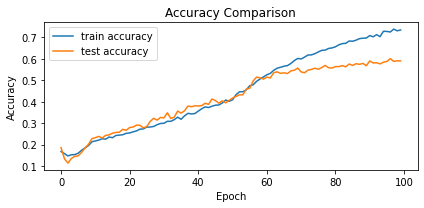

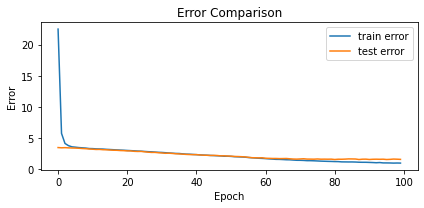

In [ ]:
plot_history(history)

In [ ]:
#this is better though still not perfect
#can see the differences in train and test are less though
#accuracy is similar - still not amazing
test_loss, test_acc = model_regularised.evaluate(X_test, Y_test, batch_size = 32)

63/63 [==============================] - 0s 6ms/step - loss: 0.6617 - accuracy: 0.8859


In [ ]:
#alot of research has shown that convolutional neural networks work the best here
#so lets see:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.2)

#axis?
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]
#adding an extra dimension in the array after train test val


In [ ]:
X_train.shape

(6390, 130, 13, 1)

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [ ]:
#building the CNN
model_CNN = keras.Sequential()
#first convolutional layer
model_CNN.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
#convolutional 2d, 32 is number of filters in layer, (3x3) is dimension of convolution mask
model_CNN.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
#max pooling layer (3x3) dim of pooling matrix
model_CNN.add(keras.layers.BatchNormalization())
#batch normalisation layer

#second convolutional layer
model_CNN.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_CNN.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_CNN.add(keras.layers.BatchNormalization())
#all the same 
#third convolutional layer
model_CNN.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_CNN.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_CNN.add(keras.layers.BatchNormalization())
#all the same
#dense layer
model_CNN.add(keras.layers.Flatten())
#need to flatten the output from the last convolutional layer
model_CNN.add(keras.layers.Dense(64, activation='relu'))
#fully connected dense layer, 64 neurons
model_CNN.add(keras.layers.Dropout(0.3))
#also applying dropout to reduce overfitting
#output layer
model_CNN.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_CNN.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_CNN.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 6, 32)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 6, 32)        128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 2, 32)        0         
 2D)                                                             
                                                      

In [ ]:
#now we train the model
history = model_CNN.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), batch_size=32, epochs=50)

Epoch 1/50
200/200 [==============================] - 15s 70ms/step - loss: 2.4449 - accuracy: 0.2232 - val_loss: 1.7915 - val_accuracy: 0.3711
Epoch 2/50
200/200 [==============================] - 13s 64ms/step - loss: 1.8984 - accuracy: 0.3465 - val_loss: 1.5075 - val_accuracy: 0.4625
Epoch 3/50
200/200 [==============================] - 17s 85ms/step - loss: 1.6750 - accuracy: 0.4175 - val_loss: 1.3757 - val_accuracy: 0.5031
Epoch 4/50
200/200 [==============================] - 13s 65ms/step - loss: 1.5549 - accuracy: 0.4543 - val_loss: 1.3037 - val_accuracy: 0.5382
Epoch 5/50
200/200 [==============================] - 13s 65ms/step - loss: 1.4661 - accuracy: 0.4833 - val_loss: 1.2374 - val_accuracy: 0.5551
Epoch 6/50
200/200 [==============================] - 13s 65ms/step - loss: 1.3876 - accuracy: 0.5078 - val_loss: 1.2073 - val_accuracy: 0.5788
Epoch 7/50
200/200 [==============================] - 13s 66ms/step - loss: 1.3427 - accuracy: 0.5290 - val_loss: 1.1882 - val_accuracy:

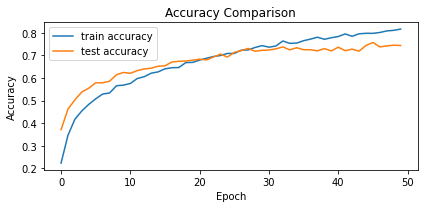

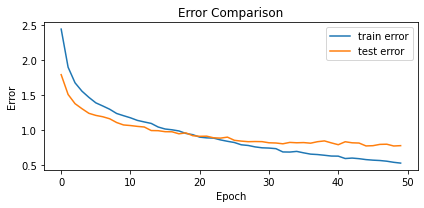

In [ ]:
plot_history(history)

In [ ]:
#this is much better! we have a low error still and a higher accuracy
#can see theres still some overfitting but its very small
#evaluating on test set
#accuracy is 0.7568 which is very close to validation set accuracy
test_loss, test_acc = model_CNN.evaluate(X_test, Y_test, verbose = 2)

63/63 - 1s - loss: 0.7281 - accuracy: 0.7568 - 1s/epoch - 21ms/step
